# Try feature selection within clusters

In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd

In [2]:
feature_path = "/scratch/users/nphill22/projects/corsello_lab/20240706_retrain_feature_select/data/processed_data/x-all.pkl"
code_path = "/scratch/users/nphill22/projects/corsello_lab/20240706_retrain_feature_select/refract"
sys.path.append(code_path)

In [3]:
# get all responses
response_files = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240706_retrain_feature_select/data/responses/*.csv")

In [4]:
# load the cluster assignments
cluster_assignments = pd.read_csv("cluster_labels.csv")

In [5]:
# load all response files
# read all responses 
response_data = {}
for response_file in response_files:
    response_name = os.path.basename(response_file).replace(".csv", "")
    response_data[response_name] = pd.read_csv(response_file)
# for every one, select LFC.CB, pert_name, ccle_name
response_data = {k: v.loc[:, ["LFC.cb", "pert_name", "ccle_name"]] for k, v in response_data.items()}
# concatenate all responses
response_data = pd.concat(response_data.values(), axis=0)
# drop duplicates on pert_name, ccle_name
response_data = response_data.drop_duplicates(subset=["pert_name", "ccle_name"])
# pivot so ccle_name is the columns and pert_name is the index
response_data = response_data.pivot(index="pert_name", columns="ccle_name", values="LFC.cb")

In [6]:
# lets train for birinapant
cluster_assignments.loc[cluster_assignments.pert_name == "birinapant", :]

,pert_name,Cluster
967,birinapant,40


In [7]:
cluster_perts = cluster_assignments.loc[cluster_assignments.Cluster == 40, "pert_name"]

In [8]:
# get responses for all these
cluster_responses = response_data.loc[response_data.index.isin(cluster_perts), :]

In [9]:
# load the features
import pickle
with open(feature_path, "rb") as f:
    feature_df = pickle.load(f)

/tmp/ipykernel_30164/925585975.py:4: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  feature_df = pickle.load(f)


In [10]:
# set columns as str
cluster_responses.columns = cluster_responses.columns.astype(str)
# drop column named nan
cluster_responses = cluster_responses.drop("nan", axis=1)

In [11]:
cluster_responses

ccle_name,143B_BONE,1618K_TESTIS,1777NRPMET_TESTIS,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,YSCCC_BILIARY_TRACT,ZR751_BREAST
pert_name,,,,,,,,,,,,,,,,,,,,,
astx660,-0.427907,-0.628091,0.937220,0.255568,-0.015401,0.525714,-0.055231,-2.209457,0.031129,-2.120274,...,-1.049346,0.125855,-0.401990,-0.321359,-0.383084,0.011822,-3.886877,-0.339751,-0.785366,-1.388591
at-406,-0.815626,-0.848243,-0.571363,0.291989,-0.474066,0.360000,0.201864,-2.291465,-0.025059,-1.788516,...,-1.443528,0.227047,-0.335309,-0.533573,-0.362153,0.029882,-4.914946,-0.172474,0.563627,-0.314320
azd5582,-4.032512,-1.009578,-0.924480,-1.330203,-0.267238,0.557944,0.327109,-1.855490,-0.292516,-4.062980,...,-2.481249,-1.030714,-0.748916,-0.665135,-1.717751,-1.125002,-3.208043,-1.356721,-0.717410,-1.209667
birinapant,NaN,NaN,NaN,0.948180,0.687494,1.129523,0.025025,-2.504765,0.167926,-2.685079,...,NaN,0.237296,-0.375938,-0.773959,0.022488,0.744670,-2.327642,0.865307,NaN,-1.200209
cudc-427,NaN,NaN,NaN,0.070148,-0.079744,0.622834,0.090763,-0.915913,-0.121867,-1.809959,...,NaN,-0.258595,-0.474904,-0.683991,-0.356450,0.259517,-3.034572,-0.272779,NaN,-0.543709
gdc-0152,NaN,NaN,NaN,0.425525,0.910734,0.905278,0.240835,-1.825552,0.946086,-0.717301,...,NaN,0.528203,0.273002,-0.222013,0.594493,0.988652,-1.840827,0.828368,NaN,-0.430002
lcl-161,NaN,NaN,NaN,0.494690,0.829830,0.609103,0.129731,-1.958022,0.013023,-1.736103,...,NaN,0.781174,0.108700,-0.111751,0.772547,1.255041,-2.547366,0.774973,NaN,-0.449010
sm-164,-0.165723,0.143875,0.586549,0.460107,-0.752557,-0.629145,0.342131,-0.475168,-0.884487,-0.912974,...,-1.029605,-0.246827,-0.208258,0.005650,0.029249,-0.613760,0.283002,-0.043172,-0.471147,0.313238
tc-ntr1-17,NaN,NaN,NaN,-0.193297,-0.192061,0.199037,0.048592,0.073767,-0.246582,-0.100770,...,NaN,-0.243782,-0.032449,0.246538,0.416441,-0.173705,-0.009349,-0.499816,NaN,0.140810


In [12]:
# fill nan in feature df with -1
feature_df = feature_df.fillna(-1)
# set ccle_name as feature_df index
feature_df = feature_df.set_index("ccle_name")
# drop low variance features
feature_df = feature_df.loc[:, feature_df.var() > 0]

In [13]:
# transpose cluster_responses
cluster_responses = cluster_responses.T

In [14]:
# fill NaN with 0
cluster_responses = cluster_responses.fillna(0)

In [15]:
# melt cluster responses
cluster_responses = cluster_responses.reset_index().melt(id_vars="ccle_name", var_name="pert_name", value_name="LFC.cb")
# set ccle_name as index
cluster_responses = cluster_responses.set_index("ccle_name")

In [16]:
cluster_responses

,pert_name,LFC.cb
ccle_name,,
143B_BONE,astx660,-0.427907
1618K_TESTIS,astx660,-0.628091
1777NRPMET_TESTIS,astx660,0.937220
22RV1_PROSTATE,astx660,0.255568
2313287_STOMACH,astx660,-0.015401
...,...,...
YD8_UPPER_AERODIGESTIVE_TRACT,tosedostat,0.769563
YH13_CENTRAL_NERVOUS_SYSTEM,tosedostat,-1.597893
YKG1_CENTRAL_NERVOUS_SYSTEM,tosedostat,0.351564


# Use responses for cluster to get top correlated features

In [58]:
def get_correlated_features(y, X, colnames, p):
    # Step 1: Compute the correlation for each column
    correlations = np.array([np.corrcoef(y, X[:, i])[0, 1] for i in range(X.shape[1])])
    
    # Step 2: Group columns by TYPE
    type_dict = {}
    for i, colname in enumerate(colnames):
        type_name = colname.split("_")[0]
        if type_name not in type_dict:
            type_dict[type_name] = []
        type_dict[type_name].append((correlations[i], colname))
    
    # Step 3: Sample the top p proportion of correlated features within each type
    selected_colnames = []
    for type_name in type_dict:
        sorted_correlations = sorted(type_dict[type_name], key=lambda x: -abs(x[0]))  # sort by absolute correlation value in descending order
        top_p_count = int(p * len(sorted_correlations))
        top_p_colnames = [colname for _, colname in sorted_correlations[:top_p_count]]
        selected_colnames.extend(top_p_colnames)

    # Step 4: Return the list of column names
    return selected_colnames

In [59]:
def get_fold_assignment(responses, key_pert_name):
    tmp_y = responses.loc[responses.pert_name == key_pert_name, :]
    tmp_y = tmp_y.drop_duplicates()
    tmp_y["decile"] = pd.qcut(tmp_y["LFC.cb"], 10, labels=False, duplicates="drop")
    # assign to a fold 
    tmp_y["fold"] = np.nan
    for i in range(10):
        tmp_y.loc[tmp_y.decile == i, "fold"] =  np.random.choice(range(10), sum(tmp_y["decile"] == i), replace=True)
    tmp_y["fold"] = tmp_y["fold"].astype(int)
    # get a dictionary mapping cell lines to fold
    fold_dict = tmp_y["fold"].to_dict()
    return fold_dict

In [60]:
fold_assignment = get_fold_assignment(cluster_responses, "birinapant")
# filter cluster_responses to only those with fold assignment
cluster_responses = cluster_responses.loc[cluster_responses.index.isin(fold_assignment.keys()), :]

In [61]:
# merge all
df_all = cluster_responses.merge(feature_df, left_index=True, right_index=True, how='inner')
feature_cols = feature_df.columns
label_cols = cluster_responses.columns
df_all["fold"] = df_all.index.map(fold_assignment)

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import shap

# Assuming your dataframe is named 'df'
groups = df_all['fold']
key_pert_name = "birinapant"

# Outer CV
outer_cv = GroupKFold(n_splits=10)

# Hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [ 3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Lists to store results
all_predictions = []
all_shap_values = []
all_X_test = []

train_iter = 0 
X_all = df_all.loc[:, feature_cols]
y_all = df_all.loc[:, label_cols]
for train_index, test_index in outer_cv.split(X_all, y_all, groups):
    train_iter += 1
    print(train_iter)
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    y_train, y_test = y_all.iloc[train_index], y_all.iloc[test_index]

    # get top features
    print("Getting top features")
    selected_feature_names = get_correlated_features(y_train.loc[:, "LFC.cb"], X_train.values, feature_cols, 0.01)
    print("Selected {} features".format(len(selected_feature_names)))

    # drop duplicates
    X_train = X_train.drop_duplicates()
    X_test = X_test.drop_duplicates()
    # subset to the key pert and selected features
    y_train = y_train.loc[y_train.pert_name == key_pert_name, :]
    y_test = y_test.loc[y_test.pert_name == key_pert_name, :]
    X_train = y_train.merge(X_train, left_index=True, right_index=True, how='left').loc[:, selected_feature_names]
    X_test = y_test.merge(X_test, left_index=True, right_index=True, how='left').loc[:, selected_feature_names]
    y_train = y_train.loc[:, "LFC.cb"]
    y_test = y_test.loc[:, "LFC.cb"]
    # get groups for this subset
    train_groups = [fold_assignment[ccle_name] for ccle_name in X_train.index]

    print("Inner Training...")
    # Inner CV
    inner_cv = GroupKFold(n_splits=9)
    
    # Randomized Search CV for hyperparameter tuning
    rf = RandomForestRegressor(random_state=42, n_jobs=8)
    search = RandomizedSearchCV(rf, param_grid, cv=inner_cv, n_iter=20, random_state=42, n_jobs=2)
    search.fit(X_train, y_train, groups=train_groups)

    # Best model
    best_model = search.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Store predictions
    predictions = pd.DataFrame({
        'ccle_name': X_test.index,
        'true': y_test,
        'pred': y_pred
    })
    all_predictions.append(predictions)
    # print pearson correlation between true and pred
    print(np.corrcoef(y_test, y_pred)[0, 1])

    # SHAP values
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    
    # Store SHAP values
    shap_df = pd.DataFrame(shap_values, index=X_test.index, columns=X_test.columns)
    all_shap_values.append(shap_df)
    all_X_test.append(X_test)

# Combine results
final_predictions = pd.concat(all_predictions, axis=0)
final_shap_values = pd.concat(all_shap_values, axis=0)
final_X_test = pd.concat(all_X_test, axis=0)

1
Getting top features
Inner Training...


/scratch/users/nphill22/conda_installs/miniconda/envs/prism/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.32639426493395446
2
Getting top features
Inner Training...
0.5587513061268461
3
Getting top features


/scratch/users/nphill22/conda_installs/miniconda/envs/prism/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/scratch/users/nphill22/conda_installs/miniconda/envs/prism/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Inner Training...
0.5712138727464703
4
Getting top features
Inner Training...
0.5554899223984385
5
Getting top features
Inner Training...
0.30915023468151387
6
Getting top features
Inner Training...
0.42432469876657325
7
Getting top features
Inner Training...
0.3822295892939938
8
Getting top features
Inner Training...
0.6467272056735186
9
Getting top features
Inner Training...
0.6100552753652431
10
Getting top features
Inner Training...
0.2319307372153247


<Axes: xlabel='true', ylabel='pred'>

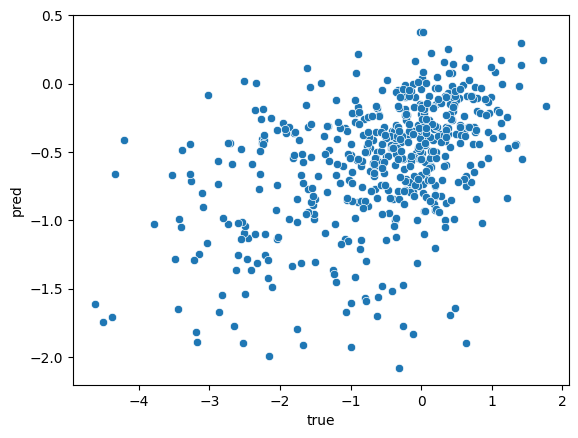

In [65]:
# plot the true vs pred final predictions
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=final_predictions, x='true', y='pred')

In [66]:
#. whats the pearson correlation between true and pred
np.corrcoef(final_predictions["true"], final_predictions["pred"])[0, 1]

np.float64(0.45046917238737905)

In [77]:
# concat all shap values
shap_values = pd.concat(all_shap_values, axis=0)
# concat all X_test
X_test = pd.concat(all_X_test, axis=0)

In [80]:
# fill NaN with 0
X_test = X_test.fillna(0)
shap_values = shap_values.fillna(0)

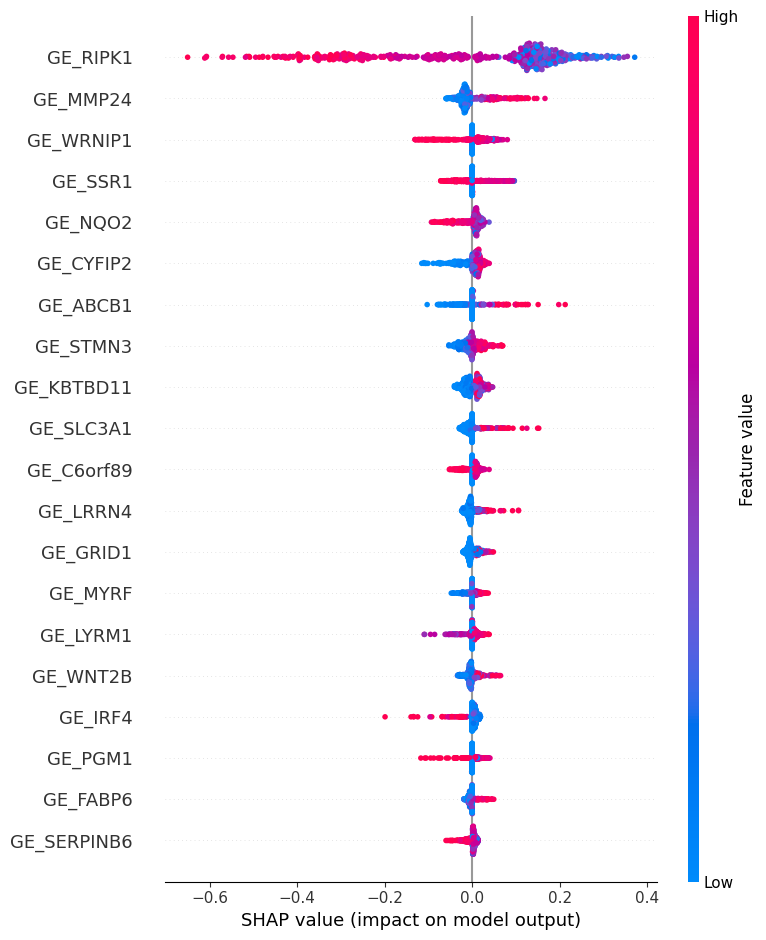

In [81]:
shap.summary_plot(shap_values.values, X_test.values, feature_names=X_test.columns)

In [68]:
# plot shap values
shap.summary_plot()

,GE_RIPK1,GE_GRID1,GE_MMP24,GE_CELF5,GE_OBSCN,GE_LRRN4,GE_SEMA4D,GE_CYFIP2,GE_GRIK5,GE_ZNF423,...,XPR_SDHAF2,XPR_PRDM10,XPR_RBX1,XPR_ZNHIT3,XPR_PIK3CA,XPR_DPY30,XPR_CEP85,PROT_PTEN,miRNA_nmiR00218.1,MET_alpha-glycerophosphocholine
ccle_name,,,,,,,,,,,,,,,,,,,,,
22RV1_PROSTATE,-0.164613,0.016395,0.030447,-0.000532,0.002253,-0.013755,-0.000979,0.008614,0.001513,-0.001919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8MGBA_CENTRAL_NERVOUS_SYSTEM,-0.467023,-0.010444,-0.011377,0.001361,-0.000066,-0.004770,-0.002365,0.002068,0.005375,0.001201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A253_SALIVARY_GLAND,0.278463,0.004626,-0.015688,0.001101,-0.000074,-0.019640,-0.000435,-0.010383,0.001045,-0.001537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2780_OVARY,0.172646,-0.006803,-0.015605,-0.000531,0.000890,-0.020884,0.000244,0.003882,0.000374,0.001217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A704_KIDNEY,0.252013,-0.004455,0.036661,0.000181,0.001523,-0.020389,0.002631,0.012562,0.000904,-0.001221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SW1353_BONE,-0.238586,0.026251,0.031588,0.002117,0.003021,-0.001008,0.000576,0.005749,0.000870,0.000127,...,0.003568,0.000039,0.001852,0.000615,0.002106,-0.000679,0.003700,-0.000984,-0.000514,0.001826
SW1573_LUNG,0.145292,0.009320,0.048892,0.001620,0.004549,0.022645,0.001722,0.009655,-0.002087,0.000002,...,-0.001021,-0.000087,0.001111,-0.000361,-0.000031,-0.002457,-0.001661,0.007377,-0.000076,-0.000901
SW1990_PANCREAS,0.155198,0.008253,-0.017602,-0.001458,0.001360,-0.006475,-0.010282,0.013307,-0.001155,0.000333,...,0.001480,-0.000042,0.002542,0.000231,0.001189,0.000716,0.002337,0.010566,-0.000925,0.000339


In [69]:
final_X_test

,GE_RIPK1,GE_GRID1,GE_MMP24,GE_CELF5,GE_OBSCN,GE_LRRN4,GE_SEMA4D,GE_CYFIP2,GE_GRIK5,GE_ZNF423,...,XPR_SDHAF2,XPR_PRDM10,XPR_RBX1,XPR_ZNHIT3,XPR_PIK3CA,XPR_DPY30,XPR_CEP85,PROT_PTEN,miRNA_nmiR00218.1,MET_alpha-glycerophosphocholine
ccle_name,,,,,,,,,,,,,,,,,,,,,
22RV1_PROSTATE,4.148121,0.321928,3.267536,0.722466,4.786074,0.028569,3.665620,3.872829,0.443607,0.028569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8MGBA_CENTRAL_NERVOUS_SYSTEM,4.786596,0.028569,0.659925,0.137504,3.250962,0.298658,3.484138,2.173127,1.007196,0.111031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A253_SALIVARY_GLAND,2.759156,0.584963,0.176323,0.731183,3.548437,0.056584,2.920293,0.678072,0.895303,0.014355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2780_OVARY,3.801159,0.056584,0.150560,1.111031,4.289097,0.056584,2.435629,3.089159,0.978196,2.107688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A704_KIDNEY,2.825786,0.028569,3.561937,0.807355,5.300490,0.887525,1.799087,5.167519,0.678072,0.014355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SW1353_BONE,4.397803,2.594549,3.056584,0.839960,4.076388,0.773996,2.918386,3.769772,0.485427,0.903038,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.437927,168.74,5.227049
SW1573_LUNG,3.647315,1.835924,6.268472,0.910733,2.956057,3.411426,4.200065,5.242221,0.263034,0.687061,...,-0.482765,-1.192137,-0.875628,-0.278272,-0.252373,0.009530,-0.159003,-0.147352,52.17,6.847961
SW1990_PANCREAS,2.927896,1.182692,0.411426,0.124328,1.925999,0.111031,1.232661,3.559492,0.176323,0.333424,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.271503,14.87,6.205985


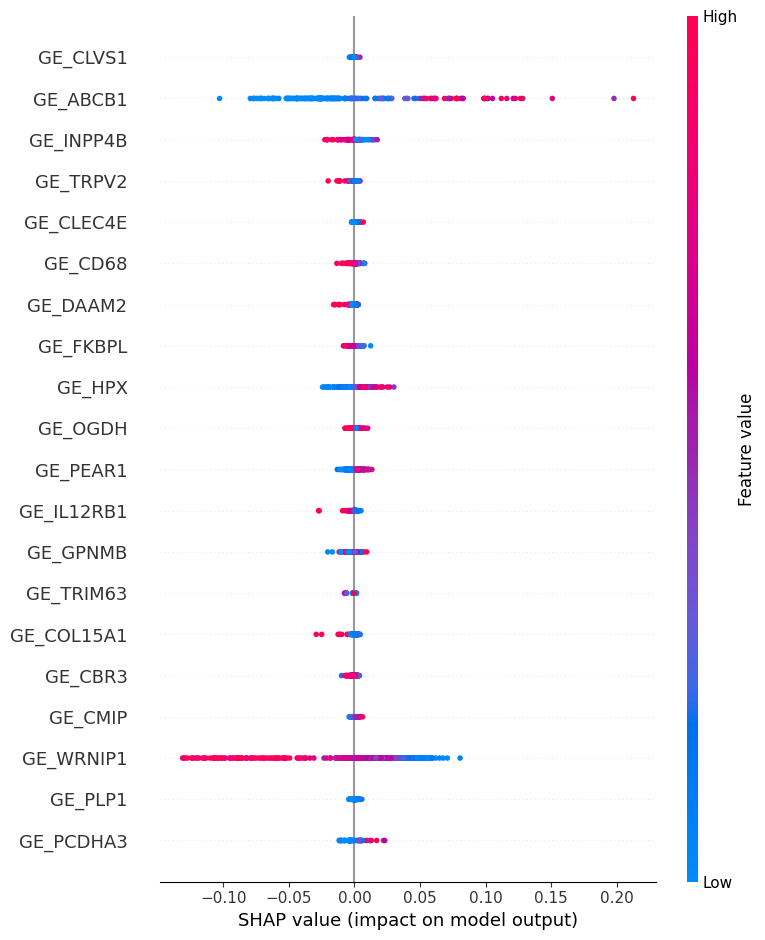

In [73]:
# Create the SHAP values object
shap_values = shap.Explanation(values=final_shap_values.values, base_values=None, data=final_X_test.values, feature_names=final_X_test.columns)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, final_X_test)

plt.show()
